 ## HUMBIO51 Assignment Week 7

##  Learning Objectives
***Students should be able to***

### How to represent a transcription factor's binding motif and scan sequences for matches 

<ol> 
<li>  <a href=#TFMotif>Explain what a transcription factor binding motif is</a> </li>
<li> <a href=#ChIPseq>Understand what is a ChIP-seq experiment and how it can be used to identify transcription factor binding genome-wide</a> </li>
<li><a href=#Regulator> Explain what a regulatory element is </a></li>
<li> <a href=#PromotersEnhancers>Explain what promoters and enhancers are</a></li>
<li> <a href=#PSSM>Make a position-specific score matrices (PSSM) from a PWM to use for transcription factor motif-scanning  </a></li>
 <li><a href=#Scan>Motif scanning along a DNA sequence </a></li>
 <li> <a href=#Biopython>Become familiar with Biopython functions module: Motif</a> </li>
 <li> <a href=#Sort>Use bedtools commands to sort ChiP-seq peak files by genome coordinates.</a></li>
<li> <a href=#Intersect>Use bedtools commands to intersect regions from multiple bed files.</a></li>
<li> <a href=#Dict>Use python dictionaries to generate frequencies of transcription factors in active enhancers.</a></li>
<li> <a href=#Plot>Generate Bar graphs to visualize the most over-represented transcription factors in GM12878.</a></li>
</ol> 

In [1]:
#Change your working directory to Week_7
import os
os.chdir('Week_7')

## Question 1: Finding Transcription factor binding sites

A [study from 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5870105/) identified several transcription factors that play a role in pancreatic cancer. These include: **PDX1**, **RFX6**, **HNF1B**, and others. The study also suggests that the gene **TGFB1** might play a role in pancreatic cancer. Our goal in this question is to determine which of these three transcription factors regulate TGFB1, and to identify the location of the transcription factor binding site(s) within the TGFB1 promoter. 

### Question 1a 
Run the code in the box below to generate a file called TGFB1.promoter.bed that includes the 2kb region upstream from the start of the TGFB1 gene. 

In [2]:
!echo "chr19\t41859838\t41861838\t.\t.\t-\n" > TGFB1.promoter.bed

In [3]:
!cat TGFB1.promoter.bed

chr19	41859838	41861838	.	.	-



Use the fastaFromBed command to extract the genetic sequence that corresponds to the positions in TGFB1.promoter.bed  Store the sequence in a file called **tgfb1_promoter.fa**

In [4]:
## BEGIN SOLUTION
!fastaFromBed -fi /data/hg19.genome.fa -bed TGFB1.promoter.bed > tgfb1_promoter.fa
##END SOLUTION

In [5]:
!cat tgfb1_promoter.fa

>chr19:41859838-41861838
GGGTCGGCAGGGGGTTTTGAAGCCGCCCCCGGCCCCACCCAGGAAGCGCACGGGGCGGGAGCGGGGGCGGCCCCCAGGGGGAGGGCATGGGGGGGCTGGGCCACCGTCCTCATCTCGCGTGGGCGGGCTCCGAGGGGGGTCCCTTCAGCCCTGGGGGAAAGGGGGCGGGCACCCCGGCTCCGCCCCGCAAACAGGGTGCTGCCTCCTGGCGGCCAAGCGCCACCAAAGCGGGTGATCCAGATGCGCTGTGGCTTTGCGGGCGGTGTGGGTCACCAGAGAAAGAGGACCAGGCGGAGAAGGCTTAATCCGGGGGATGAGACACAGGGGAGCCGACCAGAGGAGGGGGACCCAGAACGGAAGGAGAGTCAGGCTGGGAAACAAGGTAGGAGAAGAGGGTCTGTCAACATGGGGGCCTCCGGAGGGTGTCAGTGGGAGGAGGGGGCAACAGGACACCTGAAGGATGGAAGGGTCAGGAGGCAGACACCTGTAAGAATTGCTCTCCTTTACTGAGCACCTCCCATGTGGCTAAGCAGCCTCCTGTCACTcaacaccctgcgaccccatacatttactgtccccaatttacagatagggaaactgggcccagagggaccccgaggtcctagaaaggacagaagcggtgccatgccttagctggggtcagctctgacagtctctagagtctgtgctcttgaccactgtgccatcctcccccATCACTGGGTGTCCGGGGTGTGGATGGTGGTGACGTTGGAGGCAGAGTCCCTCAGCACTCCACGCCGTAGCGGTCGAAGTTGCGGAGCAGCAGGCCGATCTCCAGGTGCACGGTGCCACCAGCAGCTGTGTGCAGGCGATAGCGGTCGGCCCCACTGTAGATGGTGTCCCCATGCAGCAGCTGCGGCCCACCACCCACGAAAGCCCGTGCCAACTGTTCTCGCCAACTGCCCAGGGGCCGCCACGTGGGGCAGGCCAGCT

### Question 1b
Read in the sequence into a Sequence object using the Biopython SeqIO package (see Class 4 notes). Store the ".seq" attribute of the object in the variable **tgfb1_promoter**

In [6]:
## BEGIN SOLUTION
from Bio import SeqIO
tgfb1_promoter_complete=SeqIO.read('tgfb1_promoter.fa',"fasta")
tgfb1_promoter=tgfb1_promoter_complete.seq
print(tgfb1_promoter)
##END SOLUTION

GGGTCGGCAGGGGGTTTTGAAGCCGCCCCCGGCCCCACCCAGGAAGCGCACGGGGCGGGAGCGGGGGCGGCCCCCAGGGGGAGGGCATGGGGGGGCTGGGCCACCGTCCTCATCTCGCGTGGGCGGGCTCCGAGGGGGGTCCCTTCAGCCCTGGGGGAAAGGGGGCGGGCACCCCGGCTCCGCCCCGCAAACAGGGTGCTGCCTCCTGGCGGCCAAGCGCCACCAAAGCGGGTGATCCAGATGCGCTGTGGCTTTGCGGGCGGTGTGGGTCACCAGAGAAAGAGGACCAGGCGGAGAAGGCTTAATCCGGGGGATGAGACACAGGGGAGCCGACCAGAGGAGGGGGACCCAGAACGGAAGGAGAGTCAGGCTGGGAAACAAGGTAGGAGAAGAGGGTCTGTCAACATGGGGGCCTCCGGAGGGTGTCAGTGGGAGGAGGGGGCAACAGGACACCTGAAGGATGGAAGGGTCAGGAGGCAGACACCTGTAAGAATTGCTCTCCTTTACTGAGCACCTCCCATGTGGCTAAGCAGCCTCCTGTCACTcaacaccctgcgaccccatacatttactgtccccaatttacagatagggaaactgggcccagagggaccccgaggtcctagaaaggacagaagcggtgccatgccttagctggggtcagctctgacagtctctagagtctgtgctcttgaccactgtgccatcctcccccATCACTGGGTGTCCGGGGTGTGGATGGTGGTGACGTTGGAGGCAGAGTCCCTCAGCACTCCACGCCGTAGCGGTCGAAGTTGCGGAGCAGCAGGCCGATCTCCAGGTGCACGGTGCCACCAGCAGCTGTGTGCAGGCGATAGCGGTCGGCCCCACTGTAGATGGTGTCCCCATGCAGCAGCTGCGGCCCACCACCCACGAAAGCCCGTGCCAACTGTTCTCGCCAACTGCCCAGGGGCCGCCACGTGGGGCAGGCCAGCTGGTGGGTGCCCGGGCTACTGGGCAC

### Question 1c
We have downloaded the positions weight matrices (PWM's) for the three motifs of interest from the [HOMER motif database](http://homer.ucsd.edu/homer/motif/HomerMotifDB/homerResults.html). These are stored in the files: 

* rfx6.motif

* hnf1b.motif

* pdx1.motif

Use the unix *cat* command to examine the contents of these files. 


In [9]:
## BEGIN SOLUTION
!cat pdx1.motif
##END SOLUTION

0.092	0.272	0.965	0.001	0.038	0.797	0.895	0.001	0.001	0.873
0.40399999999999997	0.662	0.022000000000000002	0.001	0.478	0.031	0.047	0.001	0.963	0.001
0.076	0.021	0.012	0.001	0.032	0.001	0.048	0.024	0.002	0.001
0.428	0.045	0.001	0.997	0.452	0.171	0.01	0.9740000000000001	0.034	0.125


### Question 1d
Next, we will load these files into Biopython Motif objects. We will do this using the **Biopython.motifs.read** function. Note that our motif files are stored in the "pfm" (i.e. position frequency matrix) format. First, import the motifs package and use the "help" command to determine the syntax of the Biopython.motifs.read function

In [10]:
## BEGIN SOLUTION
from Bio import motifs
help(motifs.read)
##END SOLUTION 

Help on function read in module Bio.motifs:

read(handle, format, strict=True)
    Read a motif from a handle using the specified file-format.
    
    This supports the same formats as Bio.motifs.parse(), but
    only for files containing exactly one motif.  For example,
    reading a JASPAR-style pfm file:
    
    >>> from Bio import motifs
    >>> with open("motifs/SRF.pfm") as handle:
    ...     m = motifs.read(handle, "pfm")
    >>> m.consensus
    Seq('GCCCATATATGG')
    
    Or a single-motif MEME file,
    
    >>> from Bio import motifs
    >>> with open("motifs/meme.out") as handle:
    ...     m = motifs.read(handle, "meme")
    >>> m.consensus
    Seq('CTCAATCGTA')
    
    If the handle contains no records, or more than one record,
    an exception is raised:
    
    >>> from Bio import motifs
    >>> with open("motifs/alignace.out") as handle:
    ...     motif = motifs.read(handle, "AlignAce")
    Traceback (most recent call last):
        ...
    ValueError: More tha

### Question 1e
Follow the example in the help documentation for the function to read in the motif files for rfx6, pdx1, and hnf1b into variables. Hint: The syntax in the documentation for the "motifs/SRF.pfm" example is very close to the syntax you will need. 

In [11]:
## BEGIN SOLUTION
with open("pdx1.motif") as handle:
    pdx1 = motifs.read(handle, "pfm")
with open("hnf1b.motif") as handle:
    hnf1b = motifs.read(handle, "pfm")
with open("rfx6.motif") as handle:
    rfx6 = motifs.read(handle, "pfm")
##END SOLUTION 

### Question 1f
Check that the motif files were read in correctly in 1d by printing out the consensus motifs for each of the three transcription factors. Hint: m.consensus prints out the consensus motif for the example in the help file.

In [13]:
###BEGIN SOLUTION
print(rfx6.consensus)
print(pdx1.consensus)
print(hnf1b.consensus)
###END SOLUTION 

TGTTTCCTAGCAACC
TCATCAATCA
GTTAATGATTAA


### Question 1g
Before we can scan the promoter sequence of TGFB1 for the three motifs, we will need to transform the motifs from the PWM (also known as PFM) format to the PSSM format. 

What does PSSM stand for? 

**BEGIN ANSWER**: 

**END ANSWER**

Why do we need to use the PSSM format rather than the PWM format when scanning for a motif in a genome sequence? 

**BEGIN ANSWER**: 

**END ANSWER**


### Question 1h
Print the pssm for the rfx6 motif. 
Hint: the pssm is an attribute of a Motif object in Biopython, so you shouldn't have to write much additional code 


In [44]:
###BEGIN SOLUTION
rfx6.pssm
###END SOLUTION 

{'A': [-1.3075728019102921,
  -2.321928094887362,
  -7.965784284662087,
  -0.5145731728297583,
  -1.9885043611621704,
  -7.965784284662087,
  -4.380821783940931,
  -2.0115879742752116,
  1.5340616024211184,
  -7.965784284662087,
  -2.0350469470992003,
  1.9634741239748859,
  1.84799690655495,
  -7.965784284662087,
  0.7045441164738289],
 'C': [-1.3364276645824773,
  -2.3510744405468786,
  -0.6259342817774622,
  0.1056780778945369,
  -1.8365012677171204,
  1.995665409736109,
  1.6191782160590693,
  -0.5311560570253623,
  -7.965784284662087,
  -7.965784284662087,
  1.8090027749390865,
  -7.965784284662087,
  -7.965784284662087,
  1.995665409736109,
  0.7116161651493305],
 'G': [0.09491164702546698,
  1.830255324167683,
  -2.3510744405468786,
  -3.321928094887362,
  0.5220557491609643,
  -7.965784284662087,
  -7.965784284662087,
  -7.965784284662087,
  0.1322477982984395,
  1.995665409736109,
  -7.965784284662087,
  -7.965784284662087,
  -1.3510744405468789,
  -7.965784284662087,
  -1.606

### Question 1i
Scan the sequence you stored in the variable **tgfb1_promoter** for each of the three motifs. See "Motif Scanning with Biopython" section in class 11. We consider the motif a match to the sequence if it has an alignment score greater than 10. Recall that you can specify the alignment score threshold with the "threshold" parameter.  



Search for the rfx6 motif in the tgfb1_promoter. Rather than printing the values out on the screen like we did in class, store the search result in the variable "rfx6_hits". 


In [147]:
##BEGIN SOLUTION
from Bio.Seq import Seq
rfx6_hits= rfx6.pssm.search(tgfb1_promoter, threshold=10)
###END SOLUTION
rfx6_hits=[i for i in rfx6_hits]

Repeat the steps above to search for the Pdx1 motif in the tgfb1_promoter sequence and store the result in the variable pdx1_hits. 

In [148]:
##BEGIN SOLUTION
from Bio.Seq import Seq
pdx1_hits= pdx1.pssm.search(tgfb1_promoter, threshold=10)
###END SOLUTION
pdx1_hits=[i for i in pdx1_hits]

Repeat the steps above to search for the hnf1b motif in the tgfb1_promoter sequence and store the result in the variable hnf1b_hits. 

In [149]:
##BEGIN SOLUTION
from Bio.Seq import Seq
hnf1b_hits= hnf1b.pssm.search(tgfb1_promoter, threshold=10)
###END SOLUTION
hnf1b_hits=[i for i in hnf1b_hits]

### Question 1j

The helper function below iterates through every [position,score] value in the output from the   search from 1i. Fill in the rest of the helper function so it identifies the highest alignment score and the corresponding position. 

The function returns a default score of -100 and a position of "None" if there is no quality alignment of the motif to the sequence. 


In [154]:
def get_best_alignment(hits): 
    best_alignment_score=-100
    best_alignment_position=None
    for [position,score] in hits: 
        
        ###BEGIN SOLUTION
        if score > best_alignment_score: 
            best_alignment_score=score 
            best_alignment_position=position
        ###END SOLUTION  

    return best_alignment_score,best_alignment_position

### Question 1k

Execute the get_best_alignment function to find the best alignment position and score for the Rfx6, Pdx1 and Hnf1b motifs. Make sure its clear which position and score go with which transcription factor. 


In [156]:
###BEGIN SOLUTION
print('pdx1')
best_pdx1_alignment_score,best_pdx1_alignment_position=get_best_alignment(pdx1_hits)
print(best_pdx1_alignment_score)
print(best_pdx1_alignment_position)
print('hnf1b')
best_hnf1b_alignment_score,best_hnf1b_alignment_position=get_best_alignment(hnf1b_hits)
print(best_hnf1b_alignment_score)
print(best_hnf1b_alignment_position)
print('rfx6')
best_rfx6_alignment_score,best_rfx6_alignment_position=get_best_alignment(rfx6_hits)
print(best_rfx6_alignment_score)
print(best_rfx6_alignment_position)
###END SOLUTION 

pdx1
-100
None
hnf1b
-100
None
rfx6
10.23035
520


### Question 1l 
Do any motifs align well to the TGFB1 gene promoter? 

**ANSWER** 

## Question 2: Exploring CHIP-Seq Data

We have sampled 10000 regions from the human reference genome at random. At each of these regions, we have data from a CHIP-Seq experiment within the GM12878 cell (blood cell line) measuring the strength of 5 histone markers: 

* H3K4me3, 
* H3K4me1, 
* H3K36me3, 
* H3K9me3,
* H3K27me3. 

The regions are denoted with the chromosome number, start position and end position. 

The data is stored as a table in a file in your Week_7 folder called **region_x_chrom_mark.tsv**

### Question 2a. 
Read in the CHIP-Seq data into a pandas dataframe.

In [157]:
import pandas as pd
##BEGIN SOLUTION
  
chipseq_filename='region_x_chrom_mark.tsv'

# Read in the RNA-seq data matrix. 
chipseq= pd.read_table(filepath_or_buffer=chipseq_filename, 
     header=0,
     index_col=0)

chipseq.head(10)

###END SOLUTION


,H3K4me3,H3K4me1,H3K36me3,H3K9me3,H3K27me3
chrom_start_end,,,,,
chr7_127544000_127548400,-0.034576,0.999976,1.002766,-0.008026,-0.004839
chr4_76527400_76555000,0.043925,0.006553,-0.011049,0.002766,0.010979
chr5_145824000_145825600,0.007112,-0.003677,0.024232,0.002832,0.014081
chr1_20712600_20713400,0.011705,-0.002807,0.021803,-0.012496,1.020973
chr7_33139000_33140800,0.020133,0.981349,1.001418,0.020834,0.004710
chr3_76581600_76582000,0.021827,1.028691,-0.004334,0.021018,-0.000318
chr3_130516200_130529600,0.008528,-0.027219,-0.026783,0.015416,0.018576
chr13_28126600_28127600,0.003078,0.006193,1.001638,0.004833,-0.011625
chr22_38782600_38783600,1.002270,0.463840,-0.013768,0.015768,-0.000375


### Question 2b. 

Print out the number of rows and number of columns in the CHIP-seq data. Make sure it is clear which value refers to rows and which to columns. 

In [158]:
##BEGIN SOLUTION
print('rows '+str(chipseq.shape[0]))
print('cols '+str(chipseq.shape[1]))
###END SOLUTION


rows 10000
cols 5


### Question 2c. 

Print out just the line for chr4_56321200_56321600. Which of the five histone markers is present in chr4_56321200_56321600?

In [159]:
##BEGIN SOLUTION
chipseq.loc["chr4_56321200_56321600"]
###END SOLUTION

H3K4me3    -0.010096
H3K4me1    -0.054842
H3K36me3    1.004746
H3K9me3     0.002347
H3K27me3   -0.018400
Name: chr4_56321200_56321600, dtype: float64

### Question 2d. 

Make a histogram of the H3K9me3 column to get a sense for the distribution of the range of values for the histone markers. 


/opt/conda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 390'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


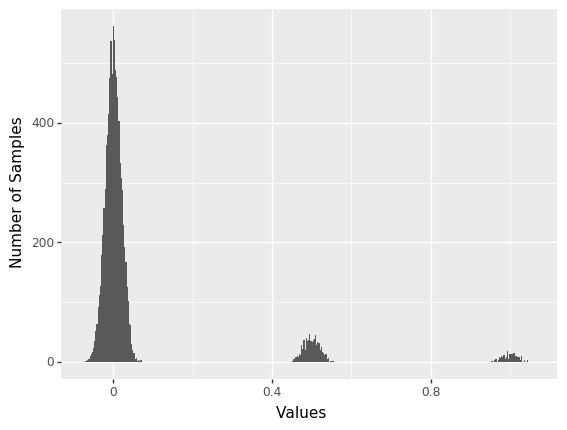

<ggplot: (-9223363282946089612)>

In [162]:
from plotnine import * 
x=chipseq['H3K9me3']
qplot(x=x,
      geom="histogram",
      xlab="Values",
      ylab="Number of Samples")

## Question 3: Exploring CHIP-Seq Data

The ENCODE project has aggregated data from multiple transcription factor ChIP-seq experiments performed on the GM12878 lymphoblastoid cell line [(over 150 such experiments)!](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_type=immortalized+cell+line&organ_slims=blood&assembly=hg19&assay_title=ChIP-seq&biosample_term_name=GM12878&assay_title=ChIP-seq). We have downloaded and merged the peak calls from these experiments in the file **Week_7/GM12878_allTFBS.bed**. This is a standard bed file with columns for 

* Chromosome 
* Start of peak 
* End of peak 
* Name of TF (transcription factor) that binds to this site in the genome. 

Additionally, we have downloaded the ENCODE [active enhancers for the GM12878 cell line.](https://www.encodeproject.org/annotations/ENCSR580CJW/) These were obtained by analyzing H3K27ac ChIP-seq peaks throughout the genome, which are indicative of active enhancer regions. The annotations are stored in the bed file **Week_7/GM12878_enhancer_regions.bed**. 


Your mission is to identify the transcription factor motifs that are most enriched within the GM12878 active enhancer regions. 

### Question 3a 

Write commands to view the first ten lines of both the GM12878_enhancer_regions.bed file and the GM12878_allTFBS.bed. file. 

In [163]:
##BEGIN SOLUTION
! head -n10 GM12878_allTFBS.bed
! head -n10 GM12878_enhancer_regions.bed
###END SOLUTION

chr1	237564	237934	Runx3
chr1	237593	237953	Ctcf
chr1	237620	237884	Rad21
chr1	237626	237876	Ctcf
chr1	237645	237861	Ctcf
chr1	237651	237855	Ctcf
chr1	237660	237850	Rad21
chr1	237661	237845	Ctcf
chr1	521337	521697	Ctcf
chr1	521430	521680	Ctcf
chr21	44771940	44776681	Distal-Prediction-1	1	.	44772580	44772730	255,205,0
chr1	235140318	235154768	Distal-Prediction-2	1	.	235147700	235147850	255,205,0
chr15	65183074	65188955	Distal-Prediction-3	1	.	65186100	65186390	255,205,0
chr10	42393340	42393490	Distal-Prediction-4	1	.	42393340	42393490	255,205,0
chr12	125256165	125261264	Distal-Prediction-5	1	.	125259220	125259370	255,205,0
chr10	81042355	81047539	Distal-Prediction-6	1	.	81046180	81046330	255,205,0
chr10	125148761	125163701	Distal-Prediction-7	1	.	125151820	125151970	255,205,0
chr22	23268834	23279737	Distal-Prediction-8	1	.	23277860	23278010	255,205,0
chr13	100082683	100089268	Distal-Prediction-9	1	.	100085160	100085310	255,205,0
chr2	85164627	85174450	Distal-Prediction-10	1	.	85166860	8

### Question 3b 

Use the bedtools [sort command](https://bedtools.readthedocs.io/en/latest/content/tools/sort.html) to sort both the Week_7/GM12878_enhancer_regions.bed file and the Week_7/GM12878_allTFBS.bed file.  Store the sorted files as "Week_7/GM12878.enh.sorted.bed" and "Week_7/GM12878.TFBS.sorted.bed".

In [164]:
##BEGIN SOLUTION
!bedtools sort -i ../Week_7/GM12878_allTFBS.bed > ../Week_7/GM12878_allTFBS.sorted.bed
!bedtools sort -i ../Week_7/GM12878_enhancer_regions.bed > ../Week_7/GM12878_enhancer_regions.sorted.bed
###END SOLUTION

### Question 3c.

Use bedtools to identify all TF (transcription factor) binding sites that overlap an enhancer region in GM12878. Store these TF binding sites in a file called **Week_7/TFBS.enh.intersection.bed**.  Examine the contents of file Week_7/TFBS.enh.intersection.bed by viewing the first ten lines of the file. <a name='intersect'>

In [165]:
##BEGIN SOLUTION
! bedtools intersect -a ../Week_7/GM12878_allTFBS.sorted.bed -b ../Week_7/GM12878_enhancer_regions.sorted.bed > ../Week_7/TFBS.enh.intersection.bed
!head -n10 ../Week_7/TFBS.enh.intersection.bed
###END SOLUTION

chr1	713716	714280	Pol2
chr1	713756	714672	Pol2
chr1	713756	714672	Pol2
chr1	713763	714510	Pol2
chr1	713802	714192	Pol2
chr1	713833	714433	Cmyc
chr1	713837	714273	Mxi1
chr1	713838	714151	Yy1
chr1	713841	714277	Maz
chr1	713845	714131	Pml


### Question 3d

Generate a dictionary called "TF_count_dict" with the following fields: <a name='dict'>

* Keys are the TF's that bind to enhancer regions within GM12878 (i.e. Pol2, Cmyc, Mxi1, ...) 
* Values are the number of times that each TF appears in a peak. 


In [166]:
def tally_TF_counts(TF_file_name): 
    #read in the TF_file_name and store the file lines in a list called 'data'
    ###BEGIN SOLUTION
    data=# Your code here
    ###END SOLUTION
    tally_dict=dict() 
    #iterate through each line in data, split the string contained in each line by the '\t' delimiter 
    for line in data: 
        tokens=line.split('\t')
         ###BEGIN SOLUTION
         #Step 1: check whether the 4th value in the list tokens (i.e. the TF that binds this site in the genome) 
         # already exists in tally_dict. 
         
        
         #Step 2: if it doesn't exist, create an entry for it in tally_dict, with key = TF and value =1 
         
        
         #Step 3: if it does exist, increment the count for the TF in the dictionary

         ###END SOLUTION
    return tally_dict 

## Execute the function tally_TF_counts on the file that contains the intersection of peaks and known TF binding sites.
## Store the dictionary it returns as TF_count_dict


SyntaxError: invalid syntax (<ipython-input-166-ff210da90cde>, line 4)

In [167]:
###BEGIN SOLUTION 
def tally_TF_counts(TF_file_name): 
    #read in the TF_file_name and store the file lines in a list called 'data'
    data=open(TF_file_name,'r').read().strip().split('\n')
    tally_dict=dict() 
    #iterate through each line in data, split the string contained in each line by the '\t' delimiter 
    for line in data: 
        tokens=line.split('\t')
        #check whether the 4th value in the list tokens (i.e. the TF that binds this site in the genome) 
        # already exists in tally_dict. 
        #Your code here 
        if tokens[3] not in tally_dict: 
        #if it doesn't exist, create an entry for it in tally_dict, with key = TF and value =1 
        #Your code here 
            tally_dict[tokens[3]]=1
        else:
        #if it does exist, increment the count for the TF in the dictionary
            tally_dict[tokens[3]]+=1
    return tally_dict 


## Execute the function tally_TF_counts on the file that contains the intersection of peaks and known TF binding sites.
TF_count_dict=tally_TF_counts("../Week_7/TFBS.enh.intersection.bed")
###END SOLUTION 

### Question 3e.  

Use the function pandas.DataFrame.from_dict to convert your tally_dict into a pandas data frame so it can be sorted.  

Use "help(pd.DataFrame.from_dict) to learn about the inputs and outputs of this function. 

In [168]:
###BEGIN SOLUTION
###END SOLUTION 

Now, execute the function, passing "tally_dict" as the input and setting orient="index" 
Store the data frame in variable "df"

In [170]:
import pandas as pd  
###BEGIN SOLUTION
df=pd.DataFrame.from_dict(TF_count_dict,orient="index")
df.head
###END SOLUTION 

<bound method NDFrame.head of            0
Pol2   97718
Cmyc    3700
Mxi1   16897
Yy1    23158
Maz    17463
...      ...
Irf3     338
Zzz3     250
Gcn5     150
Pol3     204
Spt20     15

[80 rows x 1 columns]>

### Question 3f.  

Sort the TF's in your dictionary so the TF from the TF that appears the largest number of times at the top of the file to the TF that appears the smallest number of times at the bottom. 

You may find tha the pandas.DataFrame.sort_values function is useful.

Sort the dataframe by column 0 (i.e. this column contains the counts for each TF)

Make sure you sort in *descending* order so that the most common TF's can be found with the head command. 


In [176]:
###BEGIN SOLUTION
sorted_df=df.sort_values(ascending=False,by=0)
sorted_df.head 
###END SOLUTION 

<bound method NDFrame.head of               0
Pol2      97718
Ctcf      60674
Ebf1      41045
Runx3     38432
Pax5      33475
...         ...
Zzz3        250
Pol3        204
Gcn5        150
Spt20        15
Bhlhe40c      1

[80 rows x 1 columns]>

### Question 3g. 

What are the five most common transcription factors that bind in GM12878 ? 

**ANSWER:**


### Question 3h

Generate a bar graph representing the frequency of the 30 most common TF's. The x-axis should contain the name of the TF, and the y-axis should contain the number of times it occurs within an active enhancer in GM12878. <a name='plot'>

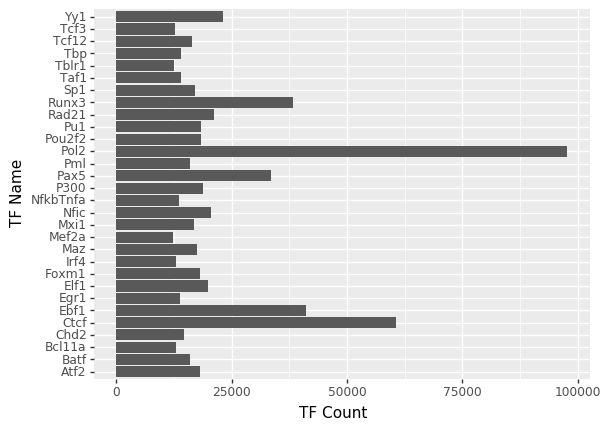

<ggplot: (8753904719315)>

In [192]:
## hint: You can use the .index function to obtain the TF names from the sorted_df data frame.

## hint: by default, the geom="bar" argument to qplot generates a histogram. To make it generate a bar graph with 
## pre-specified x and y values, add the argument stat="identity" to the qplot function. 

## hint: you might need to flip the x and y coordinates to make the bar graph axis labels legible

###BEGIN SOLUTION
common_tfs=sorted_df.iloc[0:30]
tf_names=common_tfs.index.tolist()
tf_counts=common_tfs[0].tolist()
qplot(x=tf_names,
      y=tf_counts,
      geom="bar",
      stat="identity",
      xlab="TF Name",
      ylab="TF Count"      
     )+coord_flip()

###END SOLUTION 